# Laboratorium 1 

### Napisać program w języku Julia do obliczania iloczynu skalarnego wektorów (LinearAlgebra.dot) i mnożenia macierzy kwadratowej przez wektor z użyciem operatora *.

In [1]:
using DataFrames
using CSV
using Statistics
using LinearAlgebra
using Plots

##### funkcja licząca iloczyn skalarny dwóch wygenerowanych losowo macierzy

In [2]:
function scalarProduct(size)
    matrix1 = rand(size)
    matrix2 = rand(size)
    @elapsed matrix1 ⋅ matrix2
end

scalarProduct (generic function with 1 method)

##### funkcja mnozenia wygenerowanej kwadratowej macierzy przez wygenerowany wektor x

In [3]:
function multiplyMatrices(size)
    matrix = rand(size, size)
    vector = rand(size)
    @elapsed matrix .* vector
end

multiplyMatrices (generic function with 1 method)

###  Uruchomić i zmierzyć czasy działania obydwu funkcji - każdej dla różnych rozmiarów wektorów. Dokonać 10 pomiarów dla każdego rozmiaru wektora.

##### Pomiar dla funkcji liczącej iloczyn skalarny oraz dla funkcji mnożącej kwadratową macierz przez wektor

In [4]:
df = DataFrame(size=Int[], type=String[], time=Float64[])
output = "results.csv"
for i = 1:10, j = 1:10
    size = 10000*i
    push!(df, (size, "iloczyn_skalarny", scalarProduct(size)))
end
for i = 1:10, j = 1:10
    size = 1000*i
    push!(df, (size, "mnozenie_macierzy", multiplyMatrices(size)))
end
CSV.write(output, df)

"results.csv"

#### Wczytać dane z w/w pliku do jednego DataFrame w języku Julia.

In [5]:
data = CSV.read("results.csv", delim=",", DataFrame)

Row,size,type,time
,Int64,String31,Float64
1,10000,iloczyn_skalarny,1.3458e-5
2,10000,iloczyn_skalarny,5.916e-6
3,10000,iloczyn_skalarny,4.708e-6
4,10000,iloczyn_skalarny,4.709e-6
5,10000,iloczyn_skalarny,4.708e-6
6,10000,iloczyn_skalarny,4.709e-6
7,10000,iloczyn_skalarny,4.708e-6
8,10000,iloczyn_skalarny,4.709e-6
9,10000,iloczyn_skalarny,4.709e-6


#### Korzystająć z mechanizmów DataFrame w języku Julia obliczyć średnią i odchylenie standardowe, w taki sposób, aby narysować wykresy średnich czasów obliczenia operacji w zależności od rozmiaru wektora. Dodać słupki błędów do obydwu wykresów uzyskanych z obliczenia odchylenia standardowego.

In [6]:
vectorData, matrixData = groupby(data, [:type])

Row,size,type,time
,Int64,String31,Float64
1,10000,iloczyn_skalarny,1.3458e-5
2,10000,iloczyn_skalarny,5.916e-6
3,10000,iloczyn_skalarny,4.708e-6
4,10000,iloczyn_skalarny,4.709e-6
5,10000,iloczyn_skalarny,4.708e-6
6,10000,iloczyn_skalarny,4.709e-6
7,10000,iloczyn_skalarny,4.708e-6
8,10000,iloczyn_skalarny,4.709e-6
9,10000,iloczyn_skalarny,4.709e-6


In [7]:
vectorDescription = combine(groupby(vectorData, :size), "time" => 
(x -> (mean=mean(x), std=std(x))) => [:srednia, :odchylenie_std])

Row,size,srednia,odchylenie_std
,Int64,Float64,Float64
1,10000,5.7001e-6,2.75239e-6
2,20000,9.3875e-6,3.96464e-8
3,30000,1.40749e-5,2.66727e-8
4,40000,1.87666e-5,4.88085e-8
5,50000,2.34208e-5,3.09042e-8
6,60000,2.81251e-5,5.1939e-8
7,70000,3.29084e-5,2.85035e-7
8,80000,3.75124e-5,5.56441e-8
9,90000,4.21625e-5,7.22715e-8


In [8]:
matrixDescription = combine(groupby(matrixData, :size), "time" => 
(x -> (mean=mean(x), std=std(x))) => [:srednia, :odchylenie_std])

Row,size,srednia,odchylenie_std
,Int64,Float64,Float64
1,1000,0.00186043,0.00256913
2,2000,0.00290464,0.000240125
3,3000,0.00779118,0.00117196
4,4000,0.0322554,0.0333818
5,5000,0.0316427,0.00272697
6,6000,0.0322828,0.000860716
7,7000,0.0517407,0.0233404
8,8000,0.0595559,0.00139003
9,9000,0.0739914,0.000907175


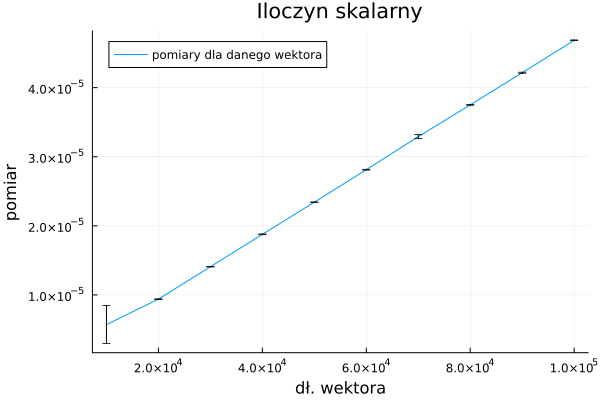

In [9]:
plotVector = plot(vectorDescription.size, vectorDescription.srednia, yerr=vectorDescription.odchylenie_std,
                title="Iloczyn skalarny", label ="pomiary dla danego wektora", xlabel="dł. wektora", ylabel="pomiar")

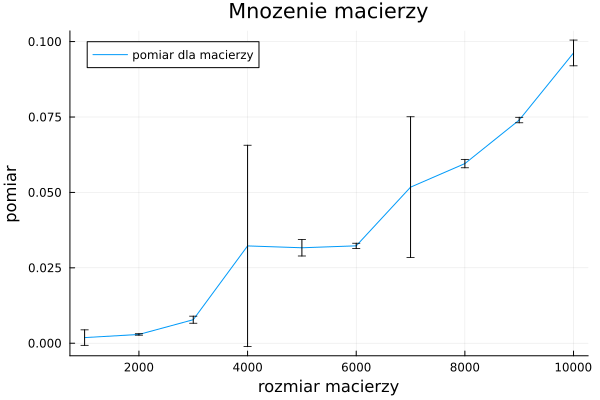

In [10]:
plotMatrix = plot(matrixDescription.size, matrixDescription.srednia, yerr=matrixDescription.odchylenie_std, 
                title="Mnozenie macierzy", label = "pomiar dla macierzy", xlabel="rozmiar macierzy", ylabel="pomiar")

#### Proszę poukładac wykresy w tabelkę za pomocą opcji layouts: https://docs.juliaplots.org/latest/layouts/#Simple-Layouts-1.

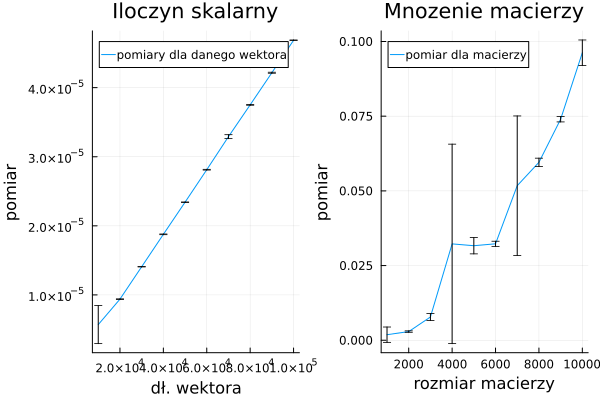

In [11]:
plot(plotVector, plotMatrix, layout = 2)